# Analysis notebook for the flash BSP

Install required libraries (if necessary).

In [2]:
# Install numpy, pandas and matplotlib
! pip install numpy pandas matplotlib

Import the needed libraries.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

---

Import the measurement data stored in the `data` folder.

In [4]:
file_path_standard1 = './data/take2/standard1.txt'
file_path_quad1 = './data/take2/quad1.txt'
file_path_standard1_dma = './data/take2/standard1_dma.txt'
file_path_quad1_dma = './data/take2/quad1_dma.txt'

with open(file_path_standard1, 'r') as file:
    input_string_standard = file.read().strip()

with open(file_path_quad1, 'r') as file:
    input_string_quad = file.read().strip()

with open(file_path_standard1_dma, 'r') as file:
    input_string_standard_dma = file.read().strip()

with open(file_path_quad1_dma, 'r') as file:
    input_string_quad_dma = file.read().strip()

As of now, in a single file there are both the read and write measurement of a specific benchmark setup. They are separated by commas and are in the following stucture: `Wxxx, Rxxx, Wxxx, Rxxx, ...` where `xxx` is the value. In order to process and plot the results, we need to separate and clean the input.

In [5]:
# Function to split the values
def split_values(input_string):
    values = input_string.split(', ')
    write_values = [int(value[1:]) for value in values if value.startswith('W')]
    read_values = [int(value[1:]) for value in values if value.startswith('R')]
    return write_values, read_values

write_times_standard, read_times_standard = split_values(input_string_standard)
write_times_quad, read_times_quad = split_values(input_string_quad)
write_times_standard_dma, read_times_standard_dma = split_values(input_string_standard_dma)
write_times_quad_dma, read_times_quad_dma = split_values(input_string_quad_dma)

In [6]:
# Create Panda dataframes

# Size of the test buffer used, in bytes
buffer_sizes = list(range(1, 1025, 1))

df_standard = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_standard, 'Write Time': write_times_standard})
df_quad = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_quad, 'Write Time': write_times_quad})
df_standard_dma = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_standard_dma, 'Write Time': write_times_standard_dma})
df_quad_dma = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_quad_dma, 'Write Time': write_times_quad_dma})

## Process the data

As the time is expected to increase with the number of bytes, it can be more difficult to understand the results. For this reason, instead of plotting the absolute values as gained from the measurement, the time per byte ratio is plotted.

In [7]:
# Obtain the time units / bytes ratio
df_standard['Read Ratio'] = df_standard['Read Time'] / df_standard['Buffer Test Size']
df_standard['Write Ratio'] = df_standard['Write Time'] / df_standard['Buffer Test Size']

df_quad['Read Ratio'] = df_quad['Read Time'] / df_quad['Buffer Test Size']
df_quad['Write Ratio'] = df_quad['Write Time'] / df_quad['Buffer Test Size']

df_standard_dma['Read Ratio'] = df_standard_dma['Read Time'] / df_standard_dma['Buffer Test Size']
df_standard_dma['Write Ratio'] = df_standard_dma['Write Time'] / df_standard_dma['Buffer Test Size']

df_quad_dma['Read Ratio'] = df_quad_dma['Read Time'] / df_quad_dma['Buffer Test Size']
df_quad_dma['Write Ratio'] = df_quad_dma['Write Time'] / df_quad_dma['Buffer Test Size']

## Plot the results
### CPU memory handling

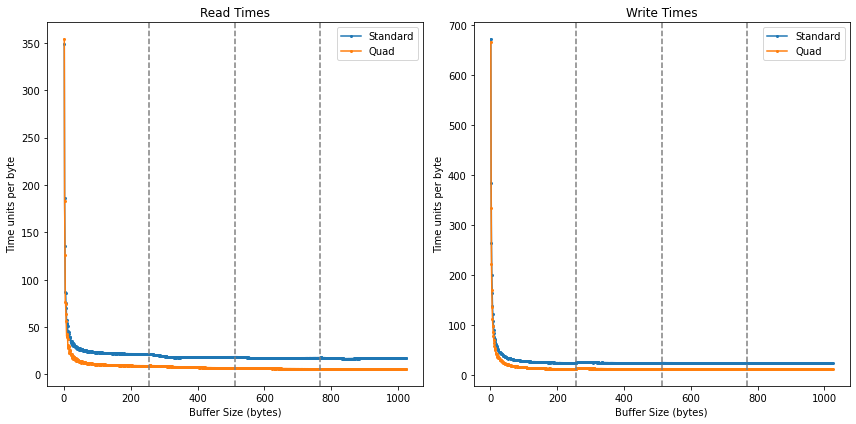

In [8]:
# Create plots
plt.figure(figsize=(12, 6))

# Plot for Read Times Standard
plt.subplot(1, 2, 1)
plt.plot(df_standard['Buffer Test Size'], df_standard['Read Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Read Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Read Times')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.tight_layout()


# Plot for Write Times Standard
plt.subplot(1, 2, 2)
plt.plot(df_standard['Buffer Test Size'], df_standard['Write Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Write Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Write Times')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.tight_layout()

# Show the plots
plt.show()

Let's zoom in to get a better understanding of what happens when the buffer size is big enough to compensate the overhead of the function calls.

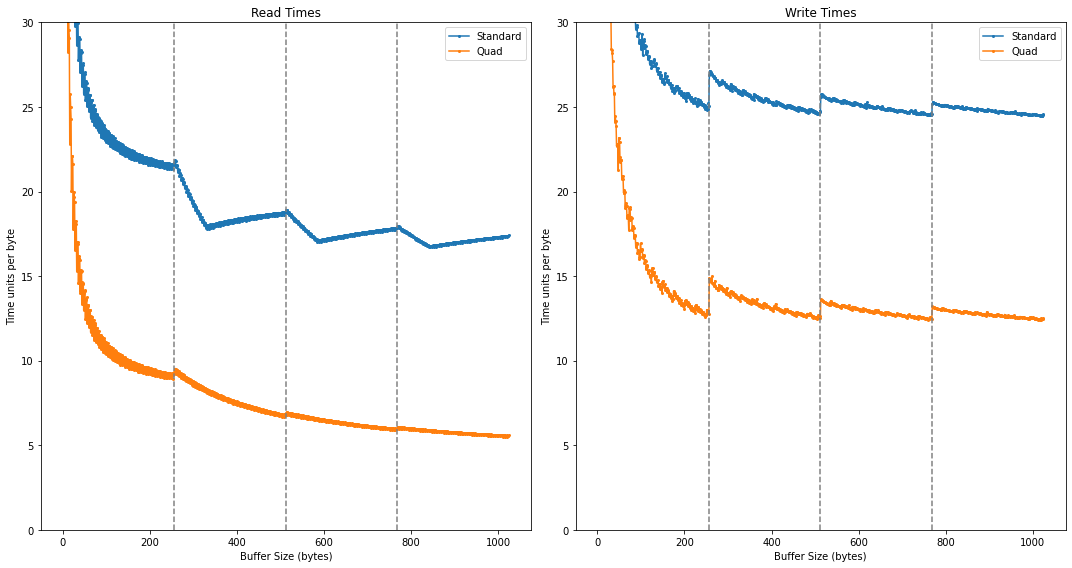

In [9]:
# Create plots
plt.figure(figsize=(15, 8))

# Plot for Read Times Standard
plt.subplot(1, 2, 1)
plt.plot(df_standard['Buffer Test Size'], df_standard['Read Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Read Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Read Times')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.ylim(0, 30)  # Limit y-axis to 0-25
plt.tight_layout()

# Plot for Write Times Standard
plt.subplot(1, 2, 2)
plt.plot(df_standard['Buffer Test Size'], df_standard['Write Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Write Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Write Times')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.ylim(0, 30)  # Limit y-axis to 0-25
plt.tight_layout()

# Show the plots
plt.show()



### DMA memory handling

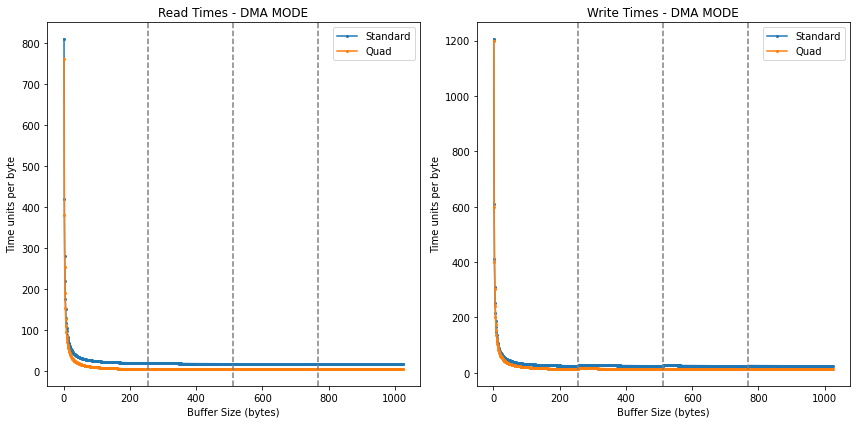

In [10]:
# Create plots
plt.figure(figsize=(12, 6))

# Plot for Read Times Standard
plt.subplot(1, 2, 1)
plt.plot(df_standard_dma['Buffer Test Size'], df_standard_dma['Read Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad_dma['Buffer Test Size'], df_quad_dma['Read Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Read Times - DMA MODE')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.tight_layout()


# Plot for Write Times Standard
plt.subplot(1, 2, 2)
plt.plot(df_standard_dma['Buffer Test Size'], df_standard_dma['Write Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad_dma['Buffer Test Size'], df_quad_dma['Write Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Write Times - DMA MODE')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.tight_layout()

# Show the plots
plt.show()

As we have the same visualisation problem than before, a zoomed in plot is also provided.

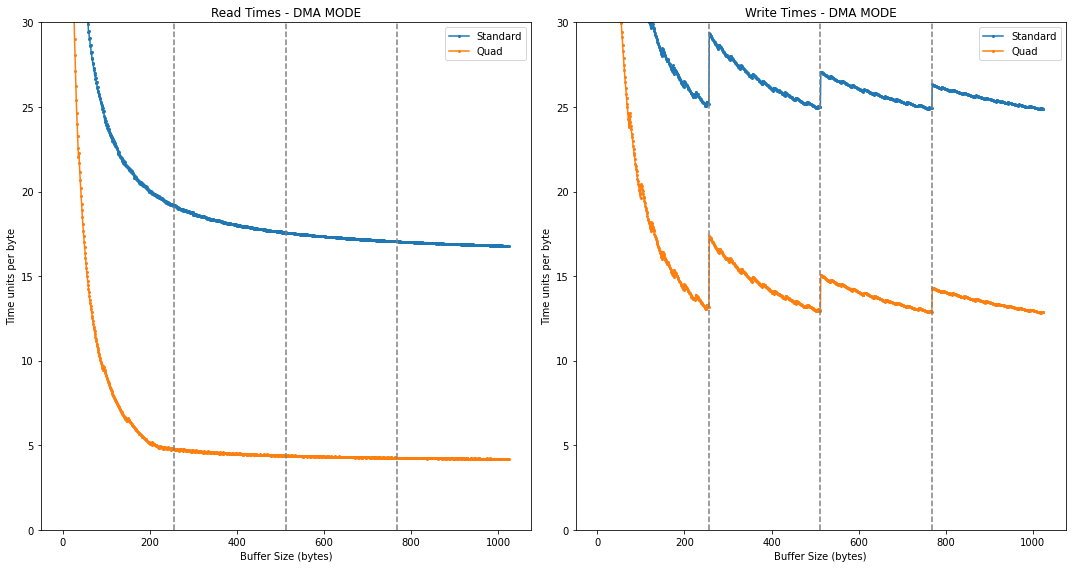

In [11]:
# Create plots
plt.figure(figsize=(15, 8))

# Plot for Read Times Standard
plt.subplot(1, 2, 1)
plt.plot(df_standard_dma['Buffer Test Size'], df_standard_dma['Read Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad_dma['Buffer Test Size'], df_quad_dma['Read Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Read Times - DMA MODE')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.ylim(0, 30)  # Limit y-axis to 0-25
plt.tight_layout()


# Plot for Write Times Standard
plt.subplot(1, 2, 2)
plt.plot(df_standard_dma['Buffer Test Size'], df_standard_dma['Write Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad_dma['Buffer Test Size'], df_quad_dma['Write Ratio'], marker='o', markersize=2, label='Quad')
plt.title('Write Times - DMA MODE')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.ylim(0, 30)  # Limit y-axis to 0-25
plt.tight_layout()

# Show the plots
plt.show()

## Comparison between CPU and DMA

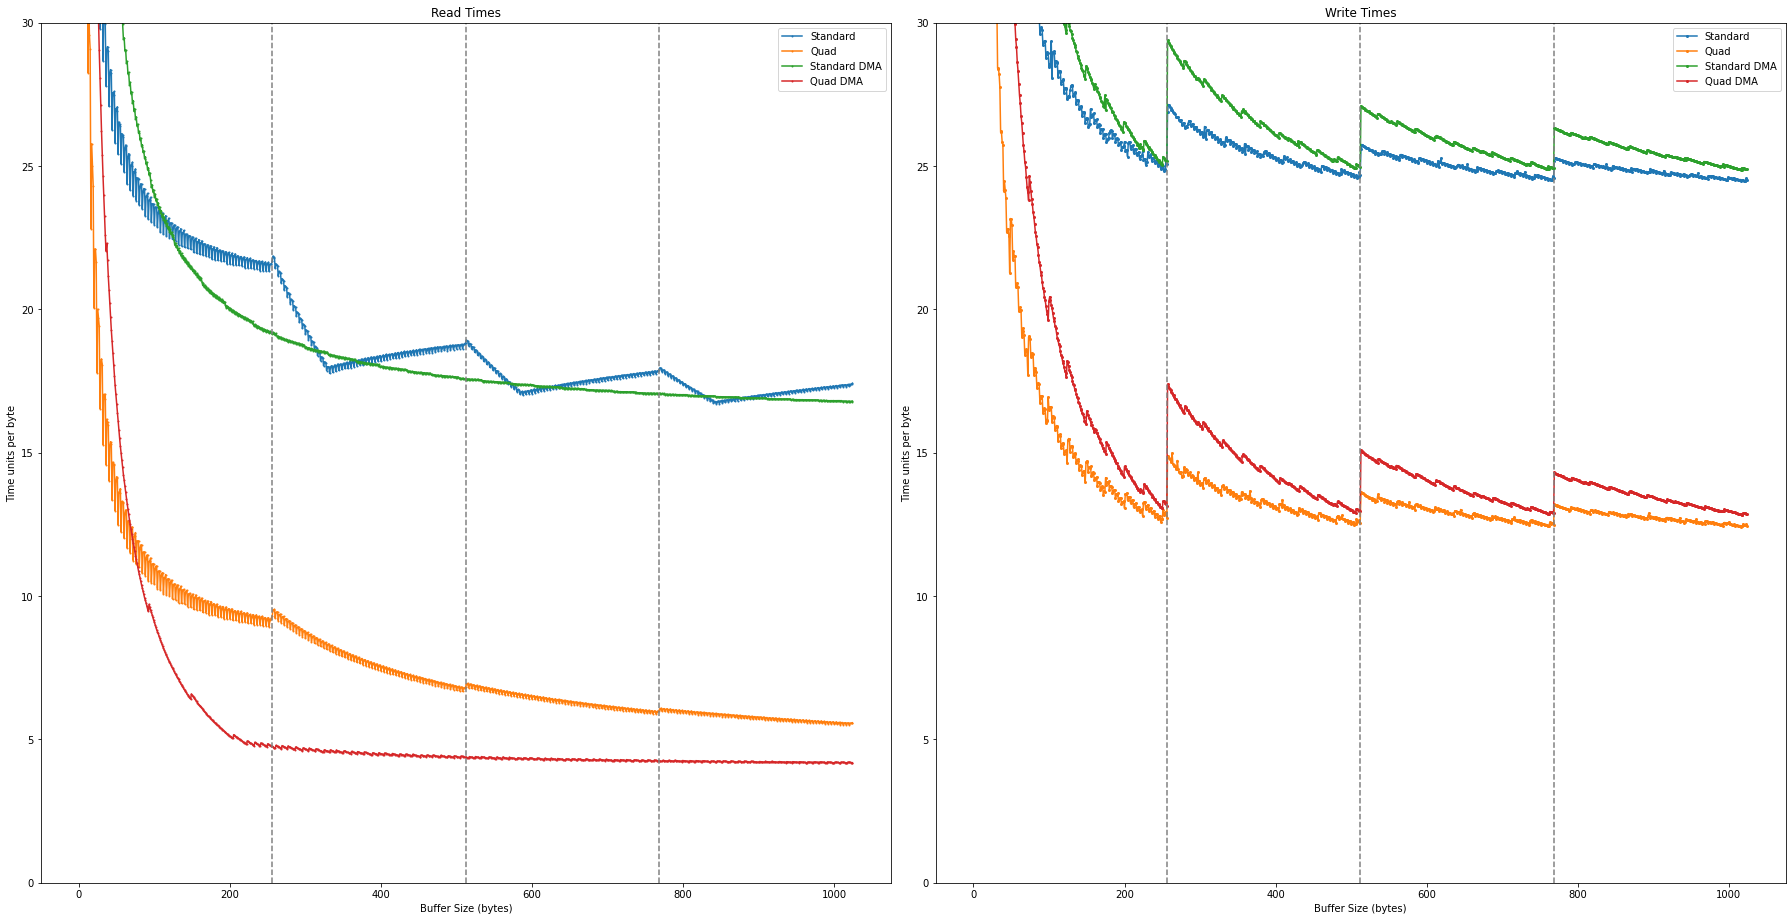

In [12]:
# Create plots
plt.figure(figsize=(25, 25))

# Plot for Read Times Standard
plt.subplot(2, 2, 1)
plt.plot(df_standard['Buffer Test Size'], df_standard['Read Ratio'], marker='o', markersize=1, label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Read Ratio'], marker='o', markersize=1, label='Quad')
plt.plot(df_standard_dma['Buffer Test Size'], df_standard_dma['Read Ratio'], marker='o', markersize=1, label='Standard DMA')
plt.plot(df_quad_dma['Buffer Test Size'], df_quad_dma['Read Ratio'], marker='o', markersize=1, label='Quad DMA')
plt.title('Read Times')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.ylim(0, 30)  # Limit y-axis to 0-25
plt.tight_layout()


# Plot for Write Times Standard
plt.subplot(2, 2, 2)
plt.plot(df_standard['Buffer Test Size'], df_standard['Write Ratio'], marker='o', markersize=2, label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Write Ratio'], marker='o', markersize=2, label='Quad')
plt.plot(df_standard_dma['Buffer Test Size'], df_standard_dma['Write Ratio'], marker='o', markersize=2, label='Standard DMA')
plt.plot(df_quad_dma['Buffer Test Size'], df_quad_dma['Write Ratio'], marker='o', markersize=2, label='Quad DMA')
plt.title('Write Times')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time units per byte')
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.ylim(0, 30)  # Limit y-axis to 0-25
plt.tight_layout()

# Show the plots
plt.show()


### Analisys of the results

In [21]:
# Find when quad read DMA is lower than quad read
# lower_values = df_quad_dma['Read Ratio'] < df_quad['Read Ratio']
lower_values = df_quad_dma['Write Ratio'] < df_quad['Write Ratio']

# Filter the dataframe to get the rows where quad read DMA is lower than quad read
filtered_df = df_quad_dma[lower_values]

print(filtered_df)
# Find the last consecutive buffer test size sequence
# consecutive_sequence = (filtered_df['Buffer Test Size'].diff() != 1).cumsum()

# # Get the last consecutive sequence
# last_sequence = consecutive_sequence.max()

# # Filter the dataframe to get the rows of the last consecutive sequence
# last_sequence_df = filtered_df[consecutive_sequence == last_sequence]

# # Print the first row of the last consecutive sequence
# print(last_sequence_df.iloc[0]['Buffer Test Size'])


Empty DataFrame
Columns: [Buffer Test Size, Read Time, Write Time, Read Ratio, Write Ratio]
Index: []


#### Quad:
For read, at around 75B is more convenient to use the DMA. Instead for the write case the DMA is never convenient.